In [17]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image
import matplotlib.pyplot as plt
import os
from shutil import copyfile

In [18]:
import analysis as an

In [19]:
# get sqlite cursor and simulation time data
cur = an.get_cursor('./2020.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [20]:
# get number of reactors and capacity timeseries
an.plot_power(cur)

Sink_Source_Inst has no values
Sink_Source_Inst has no values


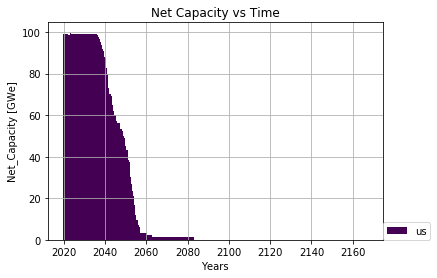

In [21]:
Image('power_plot.png')

[0. 0. 1. ... 0. 1. 0.]


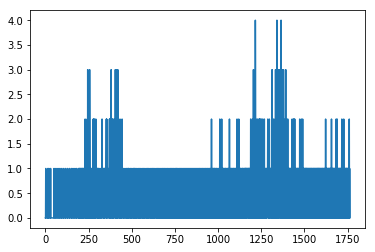

In [29]:
cur = an.get_cursor('./2020.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)
power_dict = an.get_power_dict(cur)
deploy_array, deployed_power = an.get_new_deployment(power_dict, ['us_government'],
                                                     '100*(1.01)**(t/12)', 1, 960, 0, True)
print(deploy_array)
plt.plot(deploy_array)

In [31]:
an.write_deployinst(deploy_array, 'lwr', 'lwr_dep.xml', 960)

In [16]:
# write these deploy schemes to file
for key in dep_dict.keys():
    if not os.path.isdir("./%s" %key):
        print('FOLDER %s NOT THERE,' %key)
        os.makedirs(key)    
        print('%s FOLDER MADE!' %key)
    try:
        os.remove('./%s/input.xml' %key)
    except:
        print('./%s/input.xml DOES NOT EXIST'%key)
    copyfile('./udb_recipe.xml', './%s/udb_recipe.xml' %key)
    copyfile('./udb_precise.xml', './%s/udb_precise.xml' %key)
    copyfile('./udb_no.xml', './%s/udb_no.xml' %key)
    for key2 in dep_dict[key]:
        an.write_deployinst(dep_dict[key][key2], key2, './%s/%s_dep.xml' %(key, key2),
                            960)
        if key2 == 'sfr':
            an.write_deployinst(dep_dict[key][key2], 'blanket', './%s/blanket_dep.xml' %(key), 960)

./2030_0_growth/input.xml DOES NOT EXIST
./2030_005_growth/input.xml DOES NOT EXIST
./2030_01_growth/input.xml DOES NOT EXIST
./2030_015_growth/input.xml DOES NOT EXIST
./2035_0_growth/input.xml DOES NOT EXIST
./2035_005_growth/input.xml DOES NOT EXIST
./2035_01_growth/input.xml DOES NOT EXIST
./2035_015_growth/input.xml DOES NOT EXIST
./2040_0_growth/input.xml DOES NOT EXIST
./2040_005_growth/input.xml DOES NOT EXIST
./2040_01_growth/input.xml DOES NOT EXIST
./2040_015_growth/input.xml DOES NOT EXIST
./2045_0_growth/input.xml DOES NOT EXIST
./2045_005_growth/input.xml DOES NOT EXIST
./2045_01_growth/input.xml DOES NOT EXIST
./2045_015_growth/input.xml DOES NOT EXIST
./2050_0_growth/input.xml DOES NOT EXIST
./2050_005_growth/input.xml DOES NOT EXIST
./2050_01_growth/input.xml DOES NOT EXIST
./2050_015_growth/input.xml DOES NOT EXIST


In [13]:
# delete sqlite files
for key in dep_dict.keys():
    if os.path.isfile('./%s/output.sqlite' %key):
        os.remove('./%s/output.sqlite' %key)
        print('REMOVED %s' %key)

## 